# Problem Statement

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn import tree
from sklearn.model_selection import train_test_split

%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

In [2]:
df= pd.read_csv('Fraud_check.csv')
df.head(6)

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban
0,NO,Single,68833,50047,10,YES
1,YES,Divorced,33700,134075,18,YES
2,NO,Married,36925,160205,30,YES
3,YES,Single,50190,193264,15,YES
4,NO,Married,81002,27533,28,NO
5,NO,Divorced,33329,116382,0,NO


In [3]:
#Data Description

df.shape

(600, 6)

In [4]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600 entries, 0 to 599
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Undergrad        600 non-null    object
 1   Marital.Status   600 non-null    object
 2   Taxable.Income   600 non-null    int64 
 3   City.Population  600 non-null    int64 
 4   Work.Experience  600 non-null    int64 
 5   Urban            600 non-null    object
dtypes: int64(3), object(3)
memory usage: 28.2+ KB


In [5]:
df.rename({'Marital.Status':'MS','Taxable.Income':'tax',
              'City.Population':'city_pop','Work.Experience':'Work'},inplace=True, axis=1)
df.head(6)

,Undergrad,MS,tax,city_pop,Work,Urban
0,NO,Single,68833,50047,10,YES
1,YES,Divorced,33700,134075,18,YES
2,NO,Married,36925,160205,30,YES
3,YES,Single,50190,193264,15,YES
4,NO,Married,81002,27533,28,NO
5,NO,Divorced,33329,116382,0,NO


In [6]:
df['tax']=df.tax.map(lambda x: 'Risky' if x <=30000
                        else 'Good')
df.head(6)

,Undergrad,MS,tax,city_pop,Work,Urban
0,NO,Single,Good,50047,10,YES
1,YES,Divorced,Good,134075,18,YES
2,NO,Married,Good,160205,30,YES
3,YES,Single,Good,193264,15,YES
4,NO,Married,Good,27533,28,NO
5,NO,Divorced,Good,116382,0,NO


In [7]:
le= LabelEncoder()


In [8]:
df['Undergrad'] = le.fit_transform(df['Undergrad'])
df['MS'] = le.fit_transform(df['MS'])
df['Urban'] = le.fit_transform(df['Urban'])
df['tax']=le.fit_transform(df['tax'])

In [9]:
df.head(6)


,Undergrad,MS,tax,city_pop,Work,Urban
0,0,2,0,50047,10,1
1,1,0,0,134075,18,1
2,0,1,0,160205,30,1
3,1,2,0,193264,15,1
4,0,1,0,27533,28,0
5,0,0,0,116382,0,0


In [10]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600 entries, 0 to 599
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   Undergrad  600 non-null    int32
 1   MS         600 non-null    int32
 2   tax        600 non-null    int32
 3   city_pop   600 non-null    int64
 4   Work       600 non-null    int64
 5   Urban      600 non-null    int32
dtypes: int32(4), int64(2)
memory usage: 18.9 KB


In [11]:
x=df.iloc[:,[0,1,3,4,5]]
y=df['tax']

In [12]:
x

,Undergrad,MS,city_pop,Work,Urban
0,0,2,50047,10,1
1,1,0,134075,18,1
2,0,1,160205,30,1
3,1,2,193264,15,1
4,0,1,27533,28,0
...,...,...,...,...,...
595,1,0,39492,7,1
596,1,0,55369,2,1
597,0,0,154058,0,1
598,1,1,180083,17,0


In [13]:
y

0      0
1      0
2      0
3      0
4      0
      ..
595    0
596    0
597    0
598    0
599    0
Name: tax, Length: 600, dtype: int32

In [14]:
xtrain, xtest, ytrain, ytest= train_test_split(x,y,train_size=0.75, random_state=143)


In [15]:
dt = DecisionTreeClassifier(criterion='entropy')
dt.fit(xtrain,ytrain)
ypred = dt.predict(xtest)

In [16]:
from sklearn.metrics import classification_report

print(classification_report(ytest, ypred))

              precision    recall  f1-score   support

           0       0.75      0.72      0.74       118
           1       0.11      0.12      0.12        32

    accuracy                           0.59       150
   macro avg       0.43      0.42      0.43       150
weighted avg       0.61      0.59      0.60       150



In [17]:
print('Training accuracy: ', dt.score(xtrain,ytrain))
print('Testing Accuracy: ', dt.score(xtest,ytest))

Training accuracy:  1.0
Testing Accuracy:  0.5933333333333334


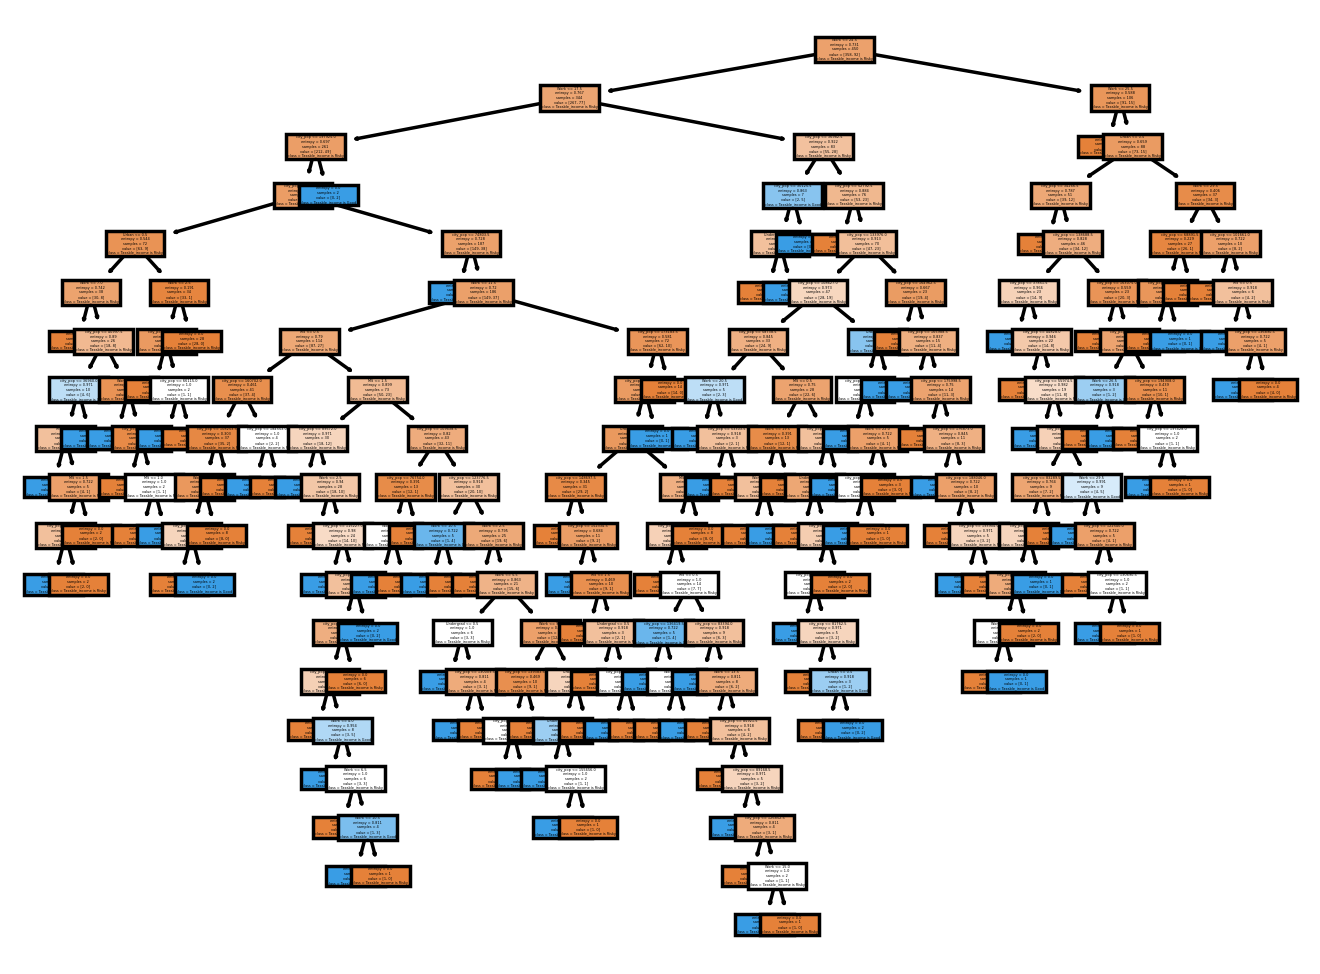

In [18]:
plt.rcParams['figure.dpi'] = 250

tree.plot_tree(dt, feature_names=x.columns, 
               class_names=['Taxable_income is Risky', 'Taxable_income is Good'],
              filled=True)
plt.show()

In [19]:
dt = DecisionTreeClassifier(criterion='gini')
dt.fit(xtrain,ytrain)
ypred = dt.predict(xtest)

In [20]:
print(classification_report(ytest, ypred))


              precision    recall  f1-score   support

           0       0.75      0.75      0.75       118
           1       0.09      0.09      0.09        32

    accuracy                           0.61       150
   macro avg       0.42      0.42      0.42       150
weighted avg       0.61      0.61      0.61       150



In [21]:
print('Training accuracy: ', dt.score(xtrain,ytrain))
print('Testing Accuracy: ', dt.score(xtest,ytest))

Training accuracy:  1.0
Testing Accuracy:  0.6066666666666667


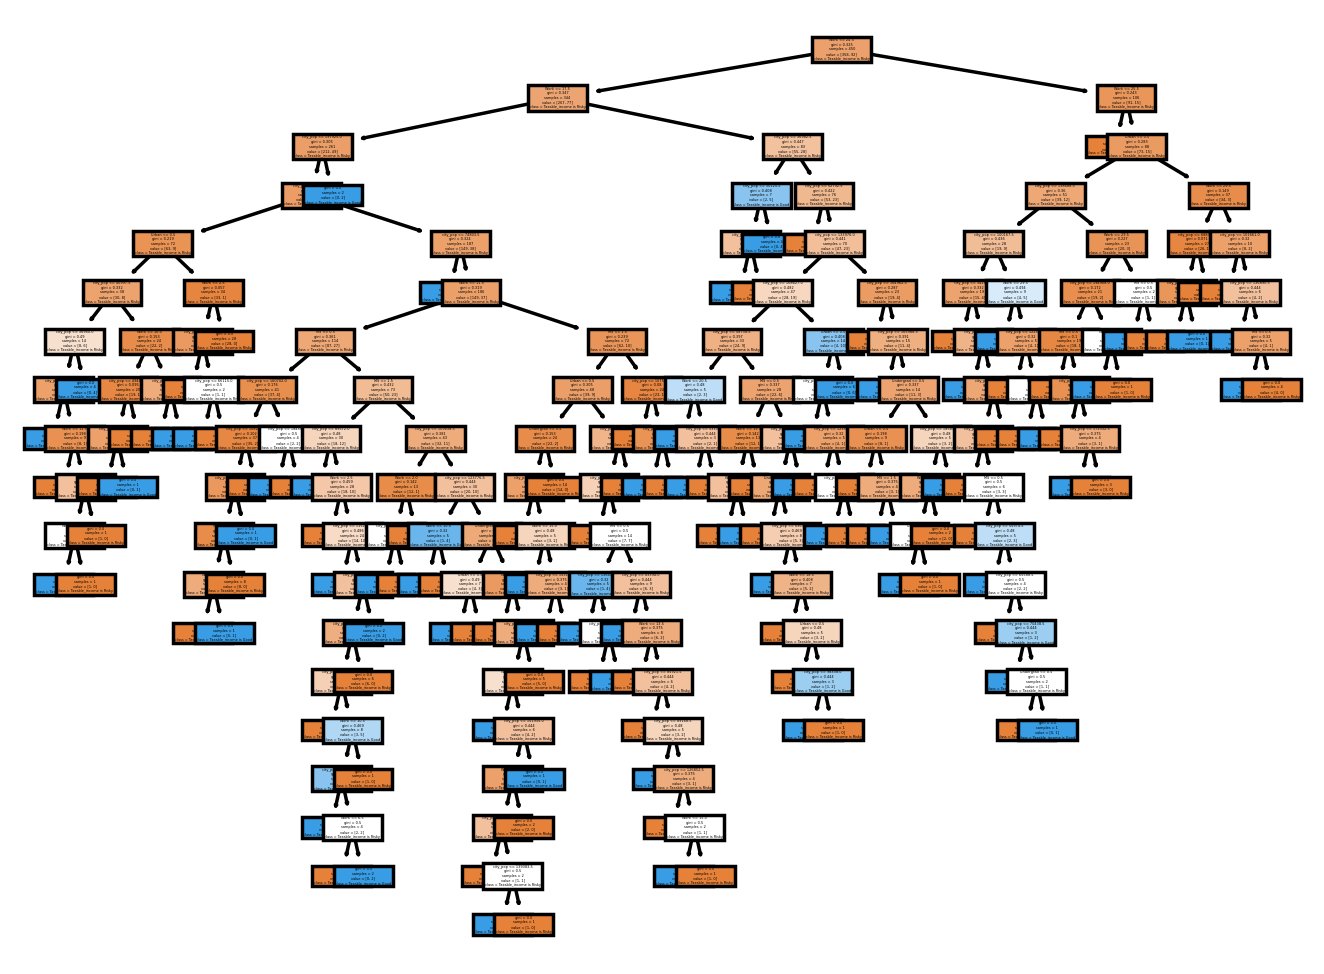

In [22]:
tree.plot_tree(dt, feature_names=x.columns, 
               class_names=['Taxable_income is Risky', 'Taxable_income is Good'],
              filled=True)
plt.show()

# Hyperparameter Tunning


In [23]:
from sklearn.model_selection import GridSearchCV


In [24]:
dt= DecisionTreeClassifier()

param= {
    'criterion': ['gini','entropy'],
    'splitter':['random','best'],
    'max_depth':[2,4,6,8,10,12,14,16,18],
     'class_weight':['balanced']
}

In [25]:
grid= GridSearchCV(DecisionTreeClassifier(),param)


In [26]:
grid.fit(xtrain,ytrain)


GridSearchCV(estimator=DecisionTreeClassifier(),
             param_grid={'class_weight': ['balanced'],
                         'criterion': ['gini', 'entropy'],
                         'max_depth': [2, 4, 6, 8, 10, 12, 14, 16, 18],
                         'splitter': ['random', 'best']})

In [27]:
grid.best_params_


{'class_weight': 'balanced',
 'criterion': 'entropy',
 'max_depth': 12,
 'splitter': 'random'}

In [28]:
dt = DecisionTreeClassifier(criterion='gini',class_weight='balanced',
                           max_depth=2, splitter='best')

dt.fit(xtrain,ytrain)
ypred = dt.predict(xtest)

In [29]:
print('Training accuracy: ', dt.score(xtrain,ytrain))
print('Testing Accuracy: ', dt.score(xtest,ytest))

Training accuracy:  0.7355555555555555
Testing Accuracy:  0.6333333333333333


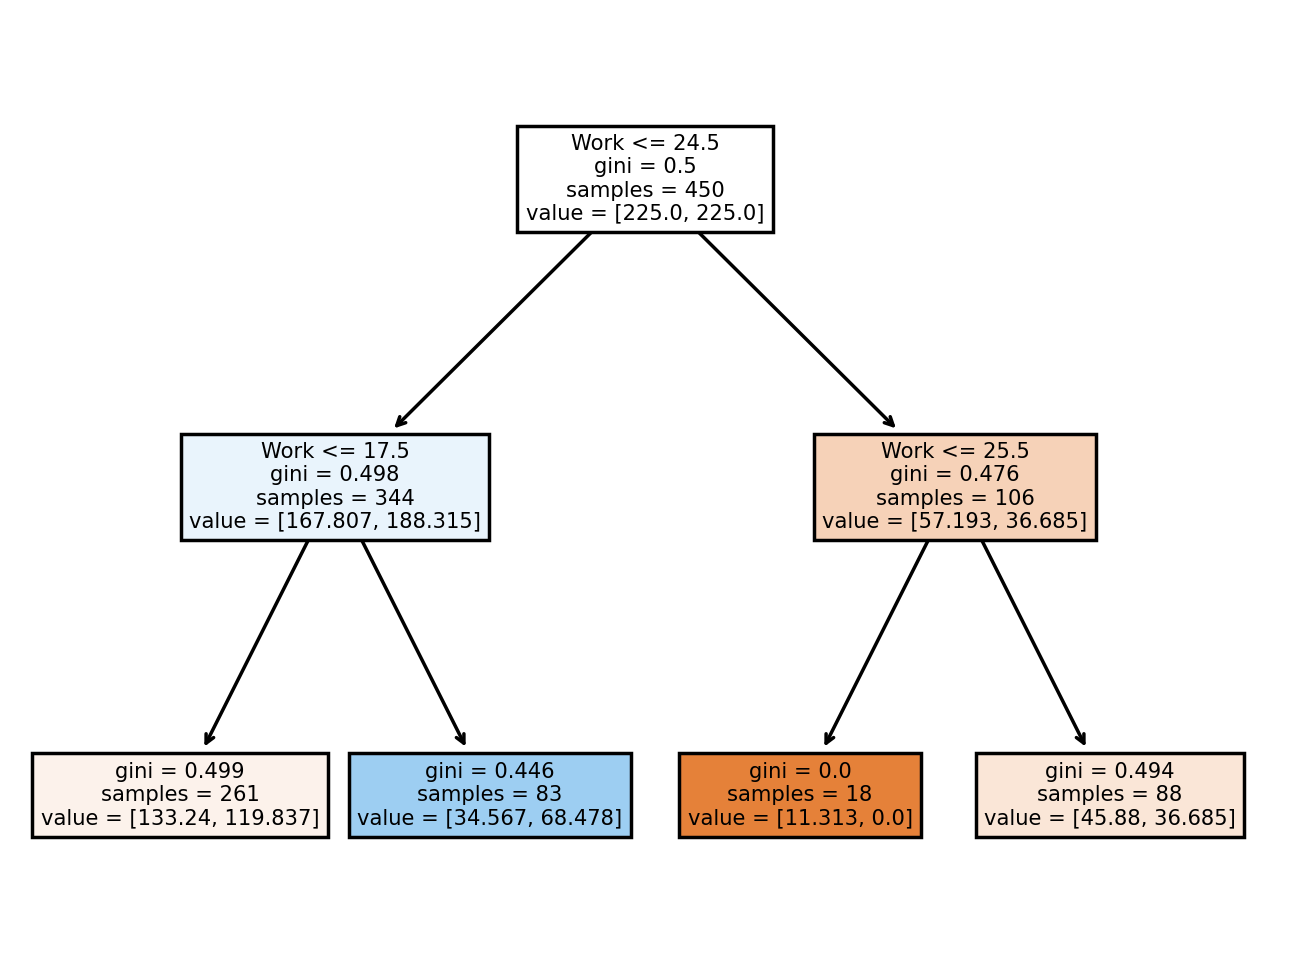

In [30]:
tree.plot_tree(dt, feature_names=x.columns, filled=True)
plt.show()